In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-tensorprod-diff)

We define a function and, for reference, its two exact partial derivatives.

In [2]:
u = lambda x, y: sin(pi * x * y - y)
du_dx = lambda x, y: pi * y * cos(pi * x * y - y)
du_dy = lambda x, y: (pi * x - 1) * cos(pi * x * y - y)

We will use an equispaced grid and second-order finite differences as implemented by `diffmat2`. First, we have a look at a plots of the exact partial derivatives.

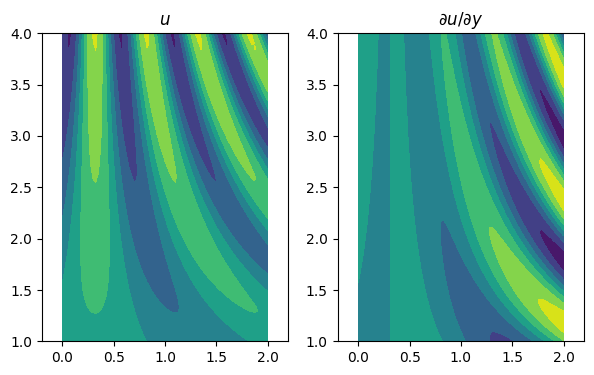

In [3]:
m, n = 80, 60
x, Dx, Dxx = FNC.diffmat2(m, [0, 2])
y, Dy, Dyy = FNC.diffmat2(n, [1, 4])
mtx, X, Y, _, _, _ = FNC.tensorgrid(x, y)

U = mtx(u)
dU_dX = mtx(du_dx)
dU_dY = mtx(du_dy)

subplot(1, 2, 1)
contourf(X.T, Y.T, dU_dX.T)
title("$u$"),  axis("equal")
subplot(1, 2, 2)
contourf(X.T, Y.T, dU_dY.T)
title("$\\partial u/\\partial y$"),  axis("equal");

Now we compare the exact partial derivatives with their finite-difference approximations. Since these are signed errors, we use a colormap that is symmetric around zero.

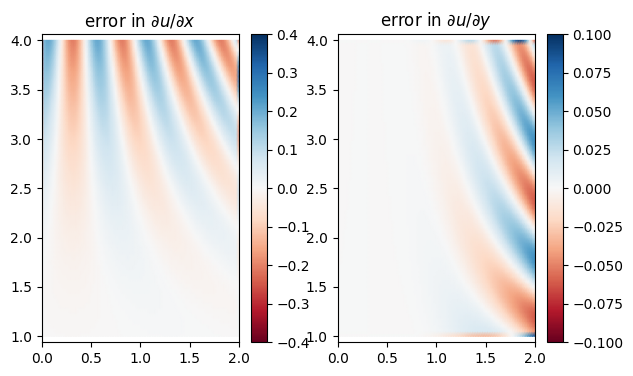

In [4]:
subplot(1, 2, 1)
pcolormesh(X, Y, Dx @ U  - dU_dX, shading="gouraud", cmap="RdBu", vmin=-0.4, vmax=0.4)
colorbar()
title("error in $\\partial u/\\partial x$"),  axis("equal")
subplot(1, 2, 2)
pcolormesh(X, Y, U @ Dy.T - dU_dY, shading="gouraud", cmap="RdBu", vmin=-0.1, vmax=0.1)
colorbar()
title("error in $\\partial u/\\partial y$"),  axis("equal");

Not surprisingly, the errors are largest where the derivatives themselves are largest.